# Multiple Linear Regression

### Import all Libraries

In [36]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [4]:
# Import dataset
data_set = pd.read_csv('compList.csv')

In [5]:
data_set.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
shape = data_set.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 50 rows and 5 columns


In [9]:
data_set.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
data_set['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
data_set.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Extracting Independent variable (X) and dependent Variable (y)  

In [12]:
#Extracting Independent and dependent Variable  
X = data_set.iloc[:,:-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [13]:
y = data_set.iloc[:,-1:]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Using Lable Encoder (Optional)

In [14]:
# Encoding Dummy Variables
# Categorical Data
# Using LableEncoder

#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label_encoder = LabelEncoder()
# X['State'] = label_encoder.fit_transform(X['State'])
# X.head()


### Use One Hot Encoder

In [15]:
# Using OneHoteEncoder

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

X_encoder = pd.DataFrame(one_hot_encoder.fit_transform(X[['State']]).toarray())

In [16]:
X_encoder.head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [17]:
# from sklearn.compose import make_column_transformer

# col_trans=make_column_transformer(
#     (OneHotEncoder(handle_unknown='ignore'),['State']),
#     remainder='passthrough')

#     x=col_trans.fit_transform(x)

In [18]:
final_X = X.join(X_encoder)

In [19]:
final_X.head()

,R&D Spend,Administration,Marketing Spend,State,0,1,2
0,165349.20,136897.80,471784.10,New York,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,0.0,1.0,0.0


### Drop the original categorical variable (State)

In [20]:
final_X.drop('State', axis=1, inplace=True)


In [21]:
final_X.head()

,R&D Spend,Administration,Marketing Spend,0,1,2
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


### Splitting the dataset into training and test set

In [22]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=0)

### Fitting the Multiple Linear Regression model to the training set

In [23]:
#Fitting the Multiple Linear Regression model to the training set

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

### Predicting the Test set result

In [24]:
#Predicting the Test set result

y_pred = model.predict(X_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [25]:
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])

In [26]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Check Accuracy of the model

In [27]:
score =  model.score(X_test, y_test)*100
print('Accuracy of the model is %.2f percent' %score) 

Accuracy of the model is 93.47 percent


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Plot the Results

In [102]:
pred_y = model.predict(X_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Visualizing the Training set results

Text(0, 0.5, 'Predicted Values')

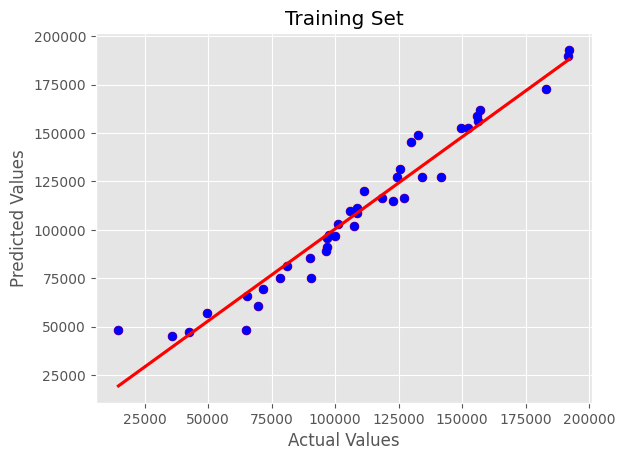

In [104]:
sns.regplot(x=y_train,y=pred_y,ci=None,color ='red')
plt.scatter(y_train,pred_y, color = 'blue', label = 'sample')
plt.title('Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Visualizing the Test set results

Text(0, 0.5, 'Predicted Values')

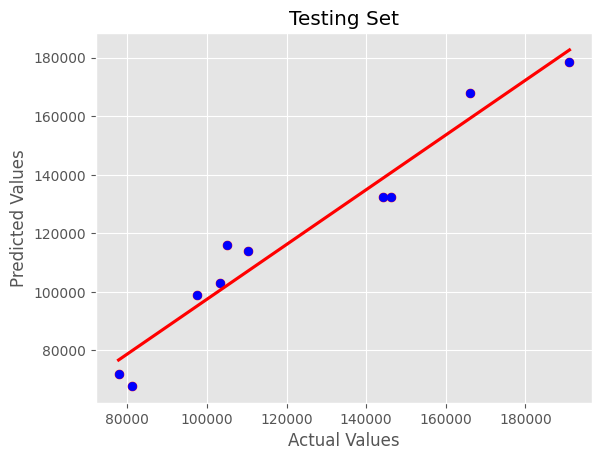

In [105]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.scatter(y_test,y_pred, color = 'blue', label = 'sample')
plt.title('Testing Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')